## Setup

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

from sklearn import metrics

## Comparing Different Prices

In [414]:
oil_prices = pd.read_csv("Oil Prices- WTI vs Others.csv", parse_dates = ['Date'], index_col = ['Date'])
oil_prices.head(10)
oil_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383 entries, 1990-01-01 to 2021-11-01
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    Price ($/Barrel)(WTI)     383 non-null    float64
 1    Price ($/Barrel)(Brent)   383 non-null    float64
 2    Price ($/Barrel)(Dubai)   383 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


<AxesSubplot:>

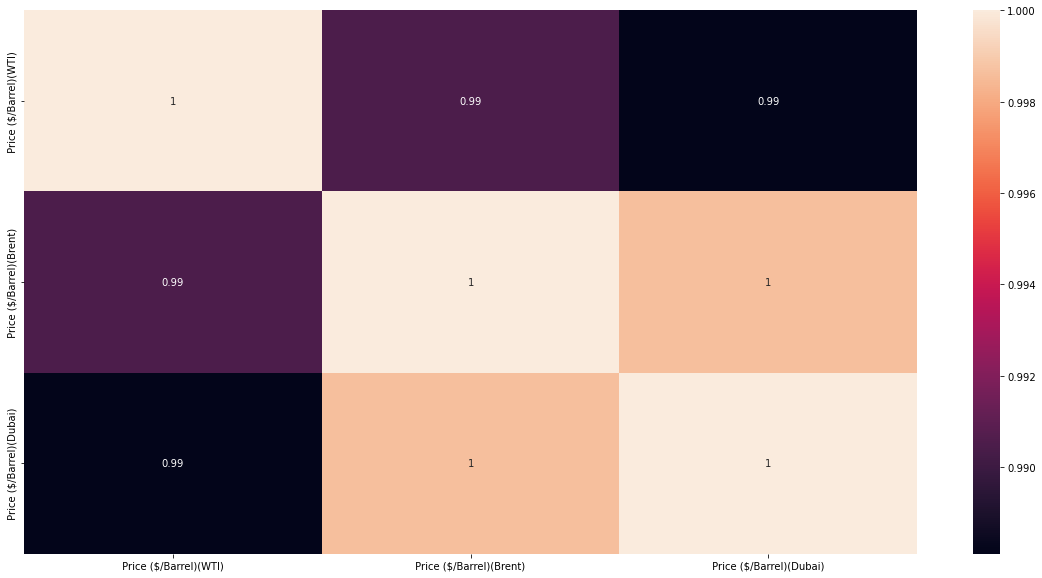

In [415]:
oil_price_correlation = oil_prices.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = oil_price_correlation, annot = True)
#Findings: very largely correlated with each other as expected

<AxesSubplot:xlabel='Date'>

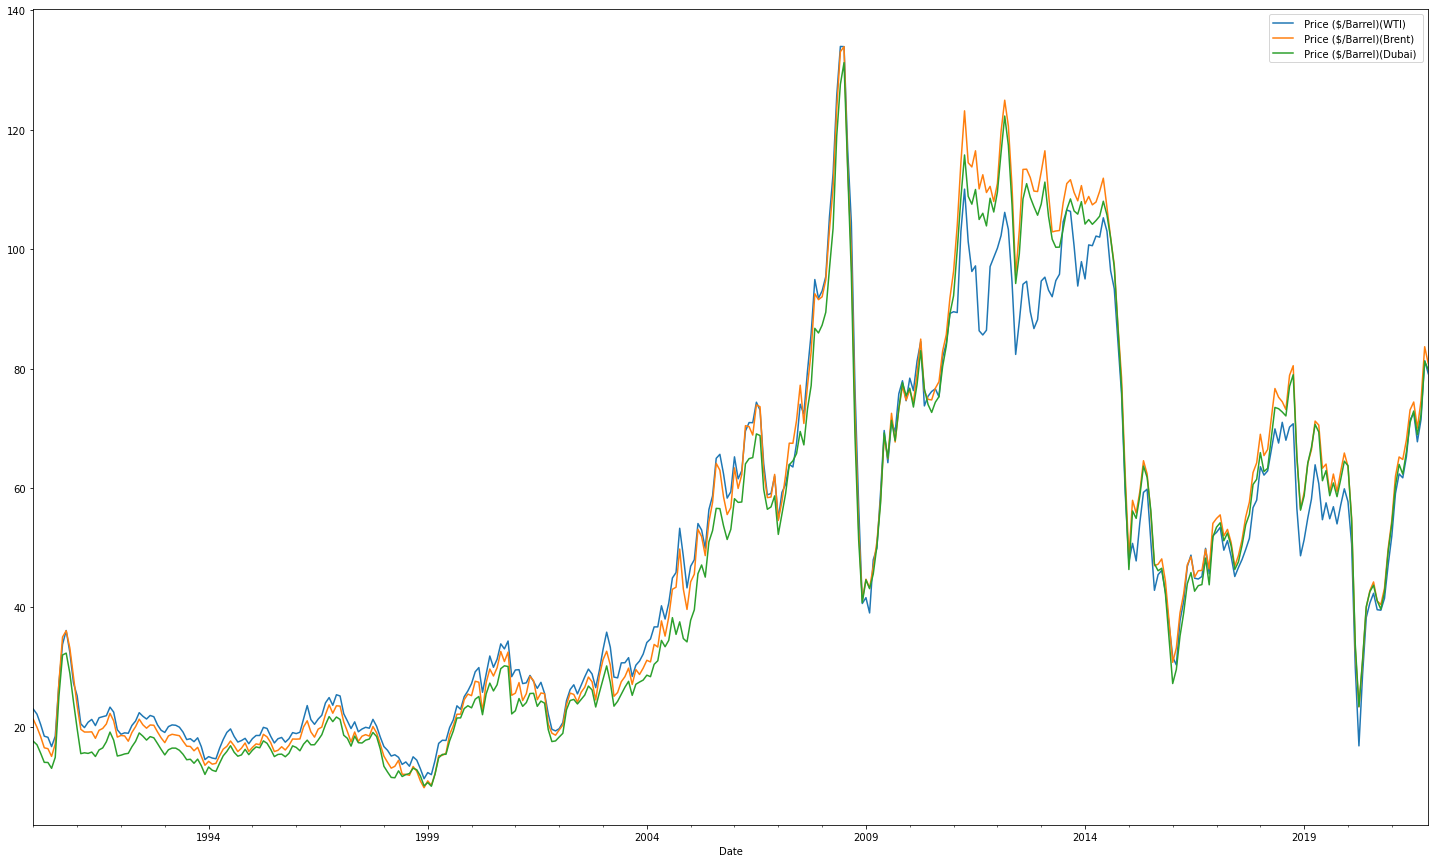

In [416]:
oil_prices.plot(figsize = (25,15) )

## Non-OPEC

### Production vs Prices

In [417]:
nonopec_prodvsprice = pd.read_csv("NonOpec_ProductionChange.csv", parse_dates = ['Date'], index_col = ['Date'])
nonopec_prodvsprice.head(5)
#nonopec_prodvsprice.info()

,"non-OPEC Production change (million barrels per day change, year on year)",WTI Real Price (GDP Deflated),Price 1 Quarter Shift,Price 2 Quarter Shift,Price 3 Quarter Shift,Price 4 Quarter Shift
Date,,,,,,
2001-01-01,0.72,34.91,33.67,32.10,24.52,25.86
2001-04-01,0.48,33.67,32.10,24.52,25.86,31.27
2001-07-01,0.59,32.10,24.52,25.86,31.27,33.53
2001-10-01,0.64,24.52,25.86,31.27,33.53,33.30
2002-01-01,0.80,25.86,31.27,33.53,33.30,39.89


<AxesSubplot:>

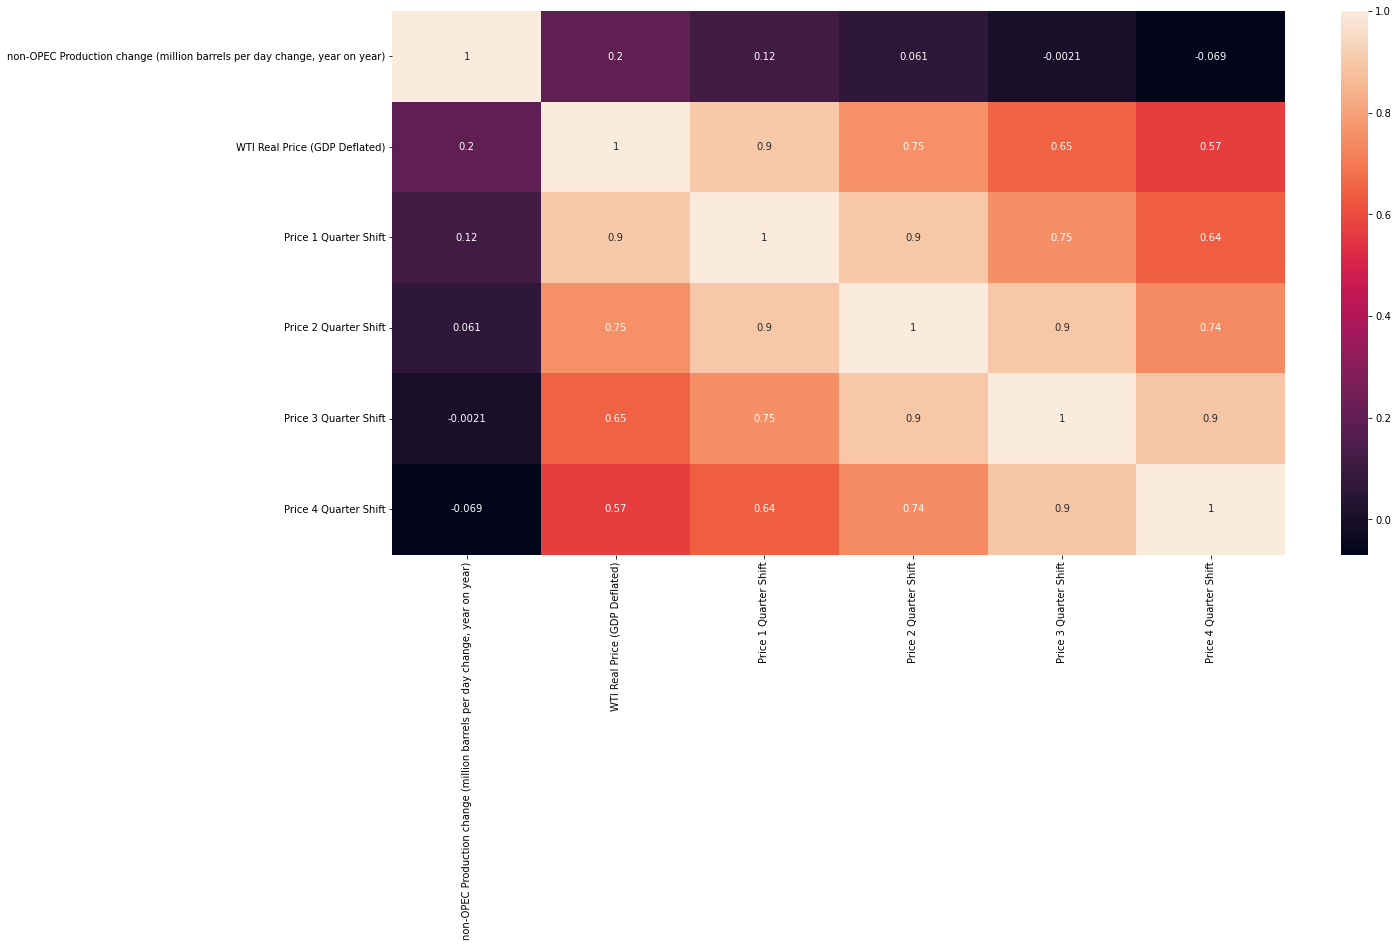

In [418]:
nonopec_prodvsprice_correlation = nonopec_prodvsprice.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = nonopec_prodvsprice_correlation, annot = True)

In [419]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score

In [420]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
Y = nonopec_prodvsprice['WTI Real Price (GDP Deflated)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train

Date
2017-04-01     43.09
2004-10-01     53.97
2018-01-01     55.34
2020-07-01     34.50
2008-07-01    119.99
               ...  
2006-01-01     68.24
2016-01-01     30.58
2018-10-01     51.54
2004-07-01     49.53
2013-10-01     91.43
Name: WTI Real Price (GDP Deflated), Length: 73, dtype: float64

#### Linear

In [421]:
#Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of linear regression model is:', rmse)
print('R-Squared of linear regression model is:', r2)

linear_crossval = cross_validate(lin_model, X_train, Y_train, cv = 10, scoring = ('neg_root_mean_squared_error'))
print('Average RMSE Test Score', linear_crossval['test_score'].mean())

RMSE of linear regression model is: 23.043791618543793
R-Squared of linear regression model is: -0.03508118598980503
Average RMSE Test Score -22.152338266769142


In [422]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(1).index, inplace = True)
Y = nonopec_prodvsprice['Price 1 Quarter Shift']
Y.drop(Y.tail(1).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train 


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of linear regression model is:', rmse)
print('R-Squared of linear regression model is:', r2)

RMSE of linear regression model is: 27.66544364918679
R-Squared of linear regression model is: -0.09237633373564336


In [423]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(2).index, inplace = True)
Y = nonopec_prodvsprice['Price 2 Quarter Shift']
Y.drop(Y.tail(2).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of linear regression model is:', rmse)
print('R-Squared of linear regression model is:', r2)

RMSE of linear regression model is: 25.530756187681938
R-Squared of linear regression model is: -0.07537617405112473


In [424]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(3).index, inplace = True)
Y = nonopec_prodvsprice['Price 3 Quarter Shift']
Y.drop(Y.tail(3).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of linear regression model is:', rmse)
print('R-Squared of linear regression model is:', r2)

RMSE of linear regression model is: 20.196356479355284
R-Squared of linear regression model is: -0.045516172644718855


In [425]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(4).index, inplace = True)
Y = nonopec_prodvsprice['Price 4 Quarter Shift']
Y.drop(Y.tail(4).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of linear regression model is:', rmse)
print('R-Squared of linear regression model is:', r2)

RMSE of linear regression model is: 19.580073204989887
R-Squared of linear regression model is: 0.005640870117638586


#### Ridge

In [426]:
#Ridge Regression
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
Y = nonopec_prodvsprice['WTI Real Price (GDP Deflated)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train

lin_model = Ridge()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of ridge regression model is:', rmse)
print('R-Squared of ridge regression model is:', r2)

RMSE of ridge regression model is: 23.042067568851905
R-Squared of ridge regression model is: -0.03492631003246527


In [427]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(1).index, inplace = True)
Y = nonopec_prodvsprice['Price 1 Quarter Shift']
Y.drop(Y.tail(1).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = Ridge()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Ridge regression model is:', rmse)
print('R-Squared of Ridge regression model is:', r2)

RMSE of Ridge regression model is: 27.663369946508716
R-Squared of Ridge regression model is: -0.09221257862949561


In [428]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(2).index, inplace = True)
Y = nonopec_prodvsprice['Price 2 Quarter Shift']
Y.drop(Y.tail(2).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = Ridge()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Ridge regression model is:', rmse)
print('R-Squared of Ridge regression model is:', r2)

RMSE of Ridge regression model is: 25.526971053764296
R-Squared of Ridge regression model is: -0.07505733186225738


In [429]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(3).index, inplace = True)
Y = nonopec_prodvsprice['Price 3 Quarter Shift']
Y.drop(Y.tail(3).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = Ridge()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Ridge regression model is:', rmse)
print('R-Squared of Ridge regression model is:', r2)

RMSE of Ridge regression model is: 20.192519119624713
R-Squared of Ridge regression model is: -0.04511890885949632


In [430]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(4).index, inplace = True)
Y = nonopec_prodvsprice['Price 4 Quarter Shift']
Y.drop(Y.tail(4).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = Ridge()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Ridge regression model is:', rmse)
print('R-Squared of Ridge regression model is:', r2)

linear_crossval = cross_validate(lin_model, X_train, Y_train, cv = 10, scoring = ('neg_root_mean_squared_error'))
print('Average RMSE Test Score', linear_crossval['test_score'].mean())

RMSE of Ridge regression model is: 19.581225035343504
R-Squared of Ridge regression model is: 0.005523877019169232
Average RMSE Test Score -23.003377105142217


#### Lasso

In [431]:
#Lasso Regression
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
Y = nonopec_prodvsprice['WTI Real Price (GDP Deflated)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train

lin_model = Lasso()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Lasso regression model is:', rmse)
print('R-Squared of Lasso regression model is:', r2)

linear_crossval = cross_validate(lin_model, X_train, Y_train, cv = 10, scoring = ('neg_root_mean_squared_error'))
print('Average RMSE Test Score', linear_crossval['test_score'].mean())

RMSE of Lasso regression model is: 23.00881437394719
R-Squared of Lasso regression model is: -0.03194135449833024
Average RMSE Test Score -22.183284895983185


In [432]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(1).index, inplace = True)
Y = nonopec_prodvsprice['Price 1 Quarter Shift']
Y.drop(Y.tail(1).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = Lasso()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Lasso regression model is:', rmse)
print('R-Squared of Lasso regression model is:', r2)

RMSE of Lasso regression model is: 27.602913354314516
R-Squared of Lasso regression model is: -0.08744386847249541


In [433]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(2).index, inplace = True)
Y = nonopec_prodvsprice['Price 2 Quarter Shift']
Y.drop(Y.tail(2).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = Lasso()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Lasso regression model is:', rmse)
print('R-Squared of Lasso regression model is:', r2)

RMSE of Lasso regression model is: 25.383394903662293
R-Squared of Lasso regression model is: -0.06299804638361328


In [434]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(3).index, inplace = True)
Y = nonopec_prodvsprice['Price 3 Quarter Shift']
Y.drop(Y.tail(3).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = Lasso()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Lasso regression model is:', rmse)
print('R-Squared of Lasso regression model is:', r2)

RMSE of Lasso regression model is: 19.93837683480353
R-Squared of Lasso regression model is: -0.018976808015785718


In [435]:
X = nonopec_prodvsprice['non-OPEC Production change (million barrels per day change, year on year)']
X.drop(X.tail(4).index, inplace = True)
Y = nonopec_prodvsprice['Price 4 Quarter Shift']
Y.drop(Y.tail(4).index, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train


lin_model = Lasso()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Lasso regression model is:', rmse)
print('R-Squared of Lasso regression model is:', r2)

RMSE of Lasso regression model is: 19.73914928433816
R-Squared of Lasso regression model is: -0.010581878676888312


### Production vs Price Delta


In [436]:
nonopec_prodvsprice_delta = pd.read_csv("NonOpec_ProductionChangevsPriceDelta.csv", parse_dates = ['Date'], index_col = ['Date'])
nonopec_prodvsprice_delta.head(5)

,"non-OPEC Production change (million barrels per day change, year on year)",WTI Real Price (GDP Deflated),Price Delta,Classifier
Date,,,,
2001-01-01,0.72,34.91,-1.24,0
2001-04-01,0.48,33.67,-1.57,0
2001-07-01,0.59,32.10,-7.58,0
2001-10-01,0.64,24.52,1.34,1
2002-01-01,0.80,25.86,5.41,1


<AxesSubplot:>

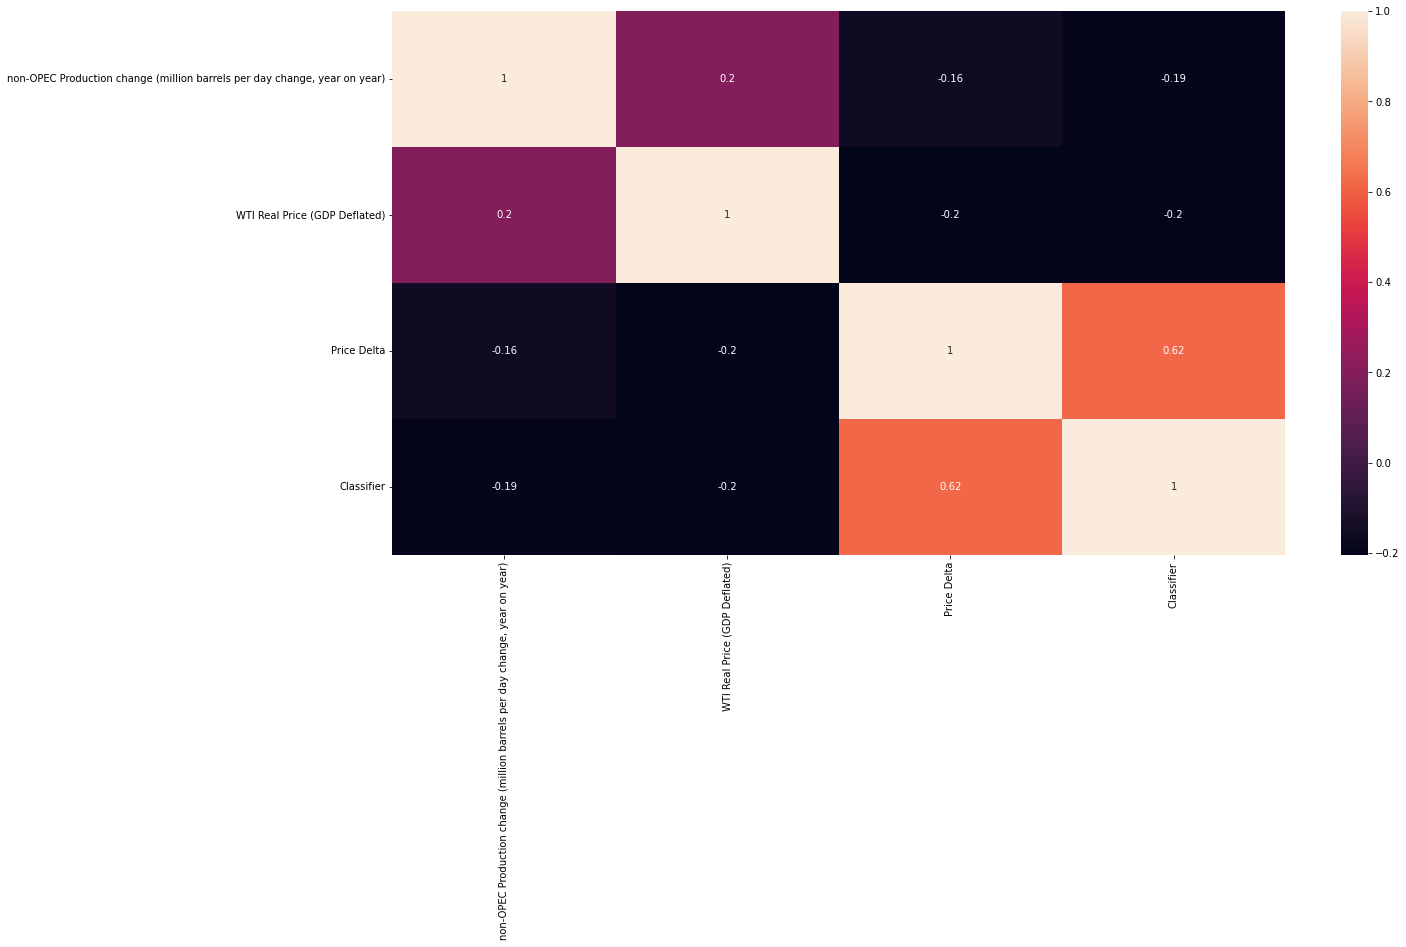

In [437]:
nonopec_prodvsprice_delta_correlation = nonopec_prodvsprice_delta.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = nonopec_prodvsprice_delta_correlation, annot = True)

In [438]:
X = nonopec_prodvsprice_delta['non-OPEC Production change (million barrels per day change, year on year)']
Y = nonopec_prodvsprice_delta['Price Delta']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_train

in_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of linear regression model is:', rmse)
print('R-Squared of linear regression model is:', r2)

linear_crossval = cross_validate(lin_model, X_train, Y_train, cv = 10, scoring = ('neg_root_mean_squared_error'))
print('Average RMSE Test Score', linear_crossval['test_score'].mean())


RMSE of linear regression model is: 11.129909616429515
R-Squared of linear regression model is: -0.13941035183397266
Average RMSE Test Score -10.295630276657048


In [439]:
#Logistic Regression
nonopec_prodvsprice_delta.head(5)
y_train = nonopec_prodvsprice_delta['Classifier']
x_train = nonopec_prodvsprice_delta.drop(['WTI Real Price (GDP Deflated)', 'Price Delta'], axis = 1)

log_model = LogisticRegression(max_iter = 1000)
precision = cross_validate(log_model, x_train, y_train,  cv= 10, scoring = ('precision'))
recall = cross_validate(log_model, x_train, y_train,  cv= 10, scoring = ('recall') )
f1 = cross_validate(log_model, x_train, y_train,  cv= 10, scoring = ('f1') )
logloss = cross_validate(log_model, x_train, y_train,  cv= 10, scoring = ('neg_log_loss') )

print('Precision test scores:', precision['test_score'])
print('Recall test scores:', recall['test_score'])
print('F1 test scores:', f1['test_score'])
print('Log Loss test scores:\n', logloss['test_score'])

print('\nAverage Precision test scores:', precision['test_score'].mean())
print('Average Recall test scores:', recall['test_score'].mean())
print('Average F1 test scores:', f1['test_score'].mean())
print('Average Log Loss test scores:', logloss['test_score'].mean()) 

Precision test scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall test scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
F1 test scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Log Loss test scores:
 [-0.11587544 -0.12230162 -0.11046363 -0.10561726 -0.11090821 -0.10299508
 -0.13001312 -0.10160781 -0.09547673 -0.11752472]

Average Precision test scores: 1.0
Average Recall test scores: 1.0
Average F1 test scores: 1.0
Average Log Loss test scores: -0.11127836237775957


### Natural Gas Production

<AxesSubplot:>

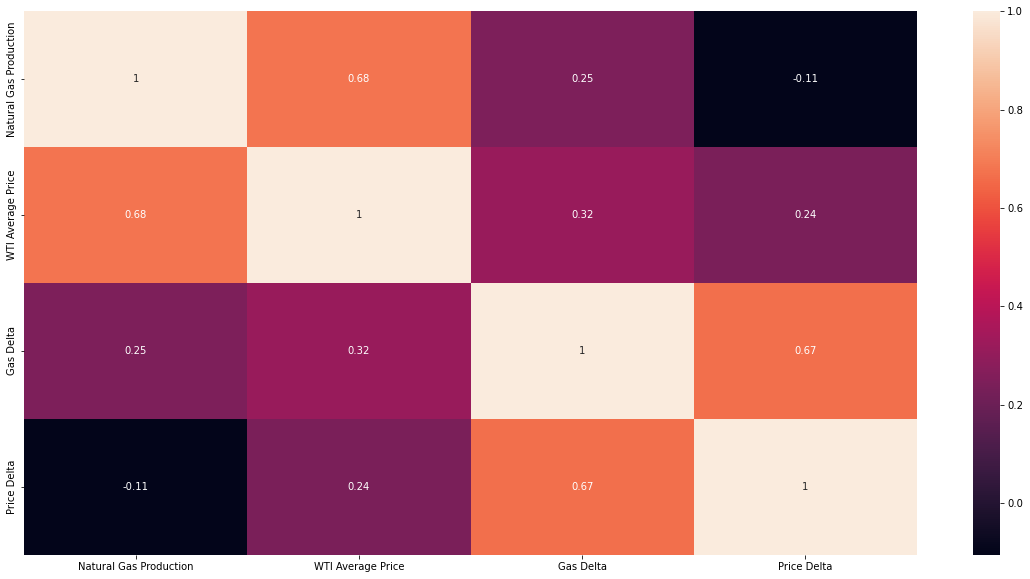

In [440]:
LNGvsWTI = pd.read_csv("LNG vs Prices.csv", parse_dates = ['Year'], index_col = ['Year'])
LNGvsWTI_correlation = LNGvsWTI.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = LNGvsWTI_correlation, annot = True)

In [441]:
X = LNGvsWTI['Natural Gas Production']
Y = LNGvsWTI['WTI Average Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [442]:
#Natural Gas Production vs WTI Average Price

#Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of linear regression model is:', rmse)
print('R-Squared of linear regression model is:', r2)

#Lasso Regression
lin_model = Lasso()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Lasso regression model is:', rmse)
print('R-Squared of Lasso regression model is:', r2)

#Ridge Regression
lin_model = Ridge()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of ridge regression model is:', rmse)
print('R-Squared of ridge regression model is:', r2)


RMSE of linear regression model is: 25.482027326282395
R-Squared of linear regression model is: 0.2574271603187316
RMSE of Lasso regression model is: 25.482480203138383
R-Squared of Lasso regression model is: 0.2574007654768259
RMSE of ridge regression model is: 25.48202785889672
R-Squared of ridge regression model is: 0.25742712927685785


Text(0, 0.5, 'True Value')

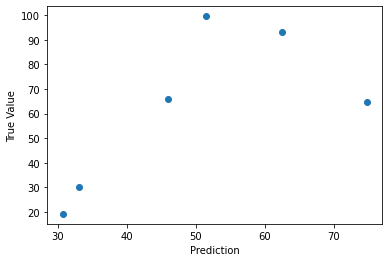

In [443]:
plt.scatter(y_test_predict, Y_test)
plt.xlabel("Prediction")
plt.ylabel("True Value")

In [444]:
#Gas vs Price Deltas
X = LNGvsWTI['Gas Delta']
Y = LNGvsWTI['Price Delta']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [445]:
#Deltas

#Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of linear regression model is:', rmse)
print('R-Squared of linear regression model is:', r2)

#Lasso Regression
lin_model = Lasso()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Lasso regression model is:', rmse)
print('R-Squared of Lasso regression model is:', r2)

#Ridge Regression
lin_model = Ridge()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of ridge regression model is:', rmse)
print('R-Squared of ridge regression model is:', r2)

RMSE of linear regression model is: 9.874502113045446
R-Squared of linear regression model is: -0.043679871982504226
RMSE of Lasso regression model is: 9.878405783996184
R-Squared of Lasso regression model is: -0.04450522764530618
RMSE of ridge regression model is: 9.874524596577558
R-Squared of ridge regression model is: -0.043684624756135104


## OPEC

### Production vs Price

In [446]:
opec_prodvsprice = pd.read_csv("OPEC_ProductionvsPrice.csv", parse_dates = ['Month'], index_col = ['Month'])

<AxesSubplot:>

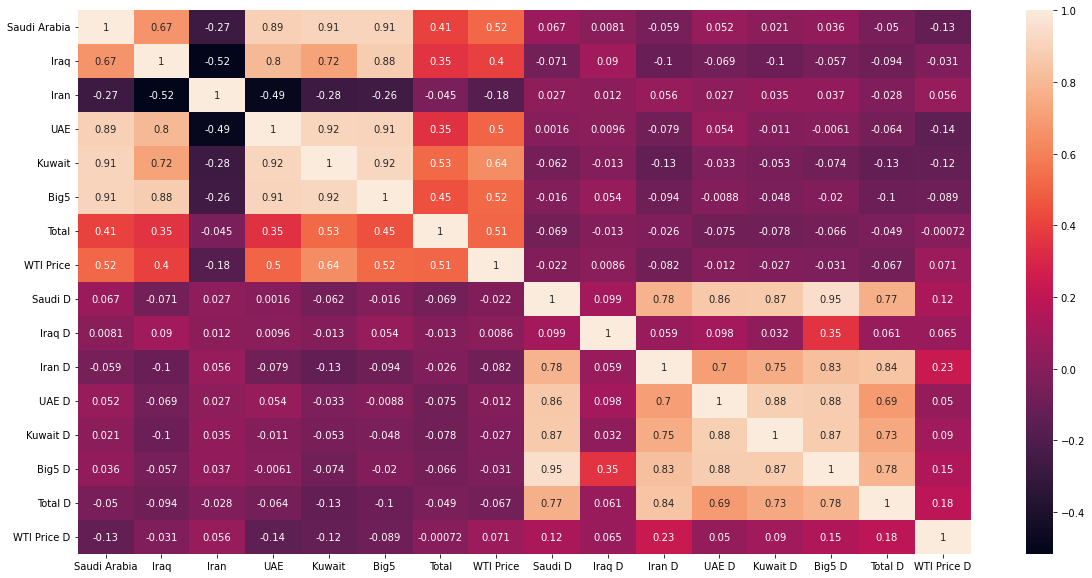

In [447]:
opec_prodvsprice_correlation = opec_prodvsprice.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = opec_prodvsprice_correlation, annot = True)

In [448]:
Y = opec_prodvsprice['WTI Price']
X = opec_prodvsprice.drop('WTI Price', axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

In [477]:
#Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of linear regression model is:', rmse)
print('R-Squared of linear regression model is:', r2)

RMSE of linear regression model is: 5.696511959444617
R-Squared of linear regression model is: -0.5725231754945126


In [478]:
#Lasso Regression
lin_model = Lasso()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Lasso regression model is:', rmse)
print('R-Squared of Lasso regression model is:', r2)

RMSE of Lasso regression model is: 6.533818699466796
R-Squared of Lasso regression model is: -1.0687746539350607


RMSE of Ridge regression model is: 21.429669283630826
R-Squared of Ridge regression model is: 0.4377979954211275


Text(0, 0.5, 'True Value')

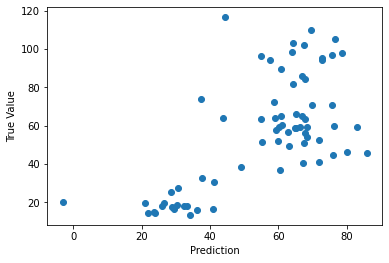

In [451]:
#Ridge Regression
lin_model = Ridge()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Ridge regression model is:', rmse)
print('R-Squared of Ridge regression model is:', r2)
plt.scatter(y_test_predict, Y_test)
plt.xlabel("Prediction")
plt.ylabel("True Value")

In [452]:
#Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score 
from sklearn import datasets, linear_model


<Figure size 14400x14400 with 0 Axes>

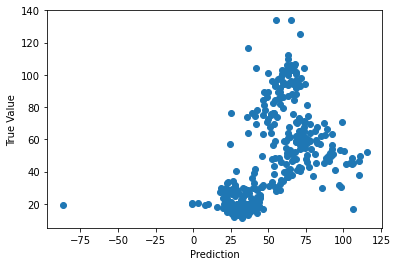

<Figure size 14400x14400 with 0 Axes>

In [453]:
ridge = linear_model.Ridge()
y_crossval_predict = cross_val_predict(ridge, X, Y, cv = 10)
plt.scatter(y_crossval_predict, Y )
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.figure(figsize= (200,200))




In [454]:
model = Ridge(max_iter= 1000)
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())


Average R2 test scores: 0.4108576266687162

Average RMSE test scores: -485.2287428697973


In [455]:
model = LinearRegression()
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())


Average R2 test scores: 0.4302205671945565

Average RMSE test scores: -472.6682075044383


In [456]:
model = Lasso(max_iter= 1000)
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())


Average R2 test scores: 0.3926623411130249

Average RMSE test scores: -487.52113419903924


### Production vs Price Delayed 1 Month

In [457]:
opec_prodvsprice_delayed = pd.read_csv("OPEC_ProductionvsPrice_1month.csv", parse_dates = ['Month'], index_col = ['Month'])

<AxesSubplot:>

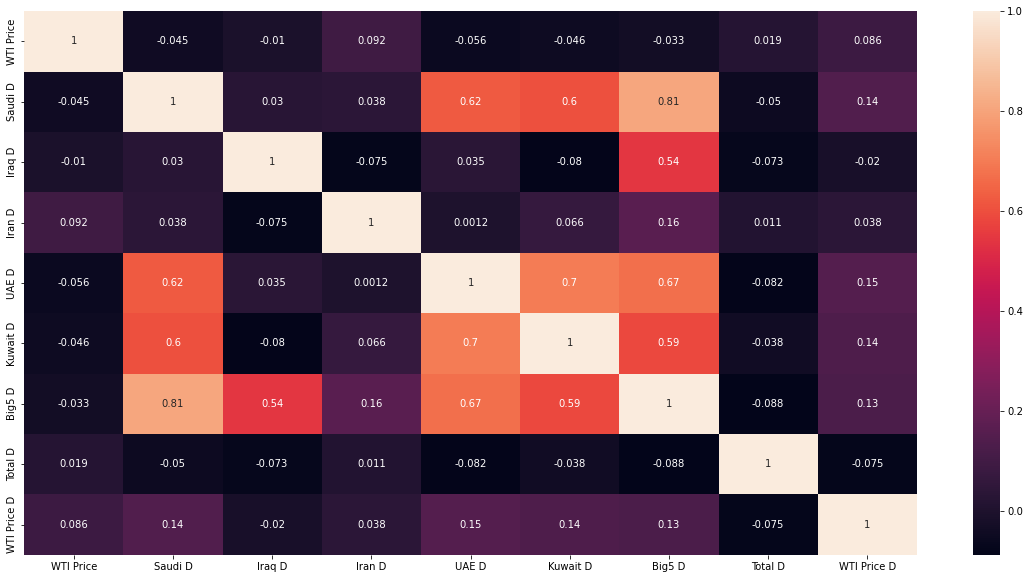

In [458]:
opec_prodvsprice_delayed_correlation = opec_prodvsprice_delayed.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = opec_prodvsprice_delayed_correlation, annot = True)

## Balances

### Inventory vs Future-Current Oil Prices

In [459]:
oecd_inventoryvsfutures = pd.read_csv("OECD_InventoryvsFutures.csv", parse_dates = ['Date'], index_col = ['Date'])

<AxesSubplot:>

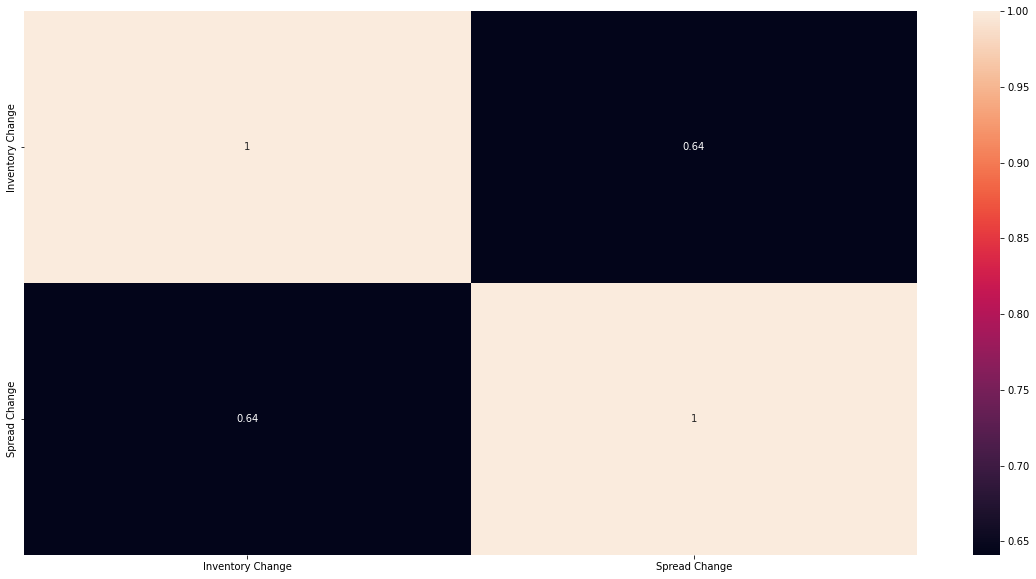

In [460]:
oecd_inventoryvsfutures_correlation = oecd_inventoryvsfutures.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = oecd_inventoryvsfutures_correlation, annot = True)

In [461]:
Y = oecd_inventoryvsfutures['Spread Change']
X = oecd_inventoryvsfutures.drop('Spread Change', axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [462]:
#Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of linear regression model is:', rmse)
print('R-Squared of linear regression model is:', r2)


RMSE of linear regression model is: 6.445442039376035
R-Squared of linear regression model is: 0.41349925640627083


In [463]:
#Lasso Regression
lin_model = Lasso()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of Lasso regression model is:', rmse)
print('R-Squared of Lasso regression model is:', r2)

RMSE of Lasso regression model is: 6.446861919497187
R-Squared of Lasso regression model is: 0.41324082495437076


RMSE of ridge regression model is: 6.445442886223087
R-Squared of ridge regression model is: 0.4134991022891582


Text(0, 0.5, 'True Value')

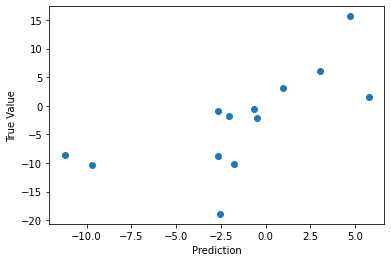

In [464]:
#Ridge Regression
lin_model = Ridge()
lin_model.fit(X_train, Y_train)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE of ridge regression model is:', rmse)
print('R-Squared of ridge regression model is:', r2)
plt.scatter(y_test_predict, Y_test)
plt.xlabel("Prediction")
plt.ylabel("True Value")

In [465]:
#Cross Validation
# ridge = linear_model.Ridge()
# y_crossval_predict = cross_val_predict(ridge, X, Y, cv = 10)
# plt.scatter(y_crossval_predict, Y )
# plt.xlabel("Prediction")
# plt.ylabel("True Value")
# plt.figure(figsize= (200,200))

In [466]:
model = Ridge(max_iter= 1000)
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())


Average R2 test scores: 0.11066975565042955

Average RMSE test scores: -33.857842951970476


In [467]:
model = LinearRegression()
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())


Average R2 test scores: 0.11066938025858705

Average RMSE test scores: -33.85784399298551



Average R2 test scores: 0.11118166285108125

Average RMSE test scores: -33.85727823046717


<Figure size 14400x14400 with 0 Axes>

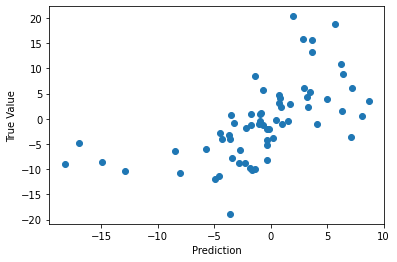

<Figure size 14400x14400 with 0 Axes>

In [468]:
model = Lasso(max_iter= 1000)
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())

lasso = linear_model.Lasso()
y_crossval_predict = cross_val_predict(lasso, X, Y, cv = 10)

plt.scatter(y_crossval_predict, Y )
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.figure(figsize= (200,200))


## Financial Markets

### Commodities

In [469]:
WTIvsCommodities = pd.read_csv("WTI vs Commodities.csv", parse_dates = ['Date'], index_col = ['Date'])
WTIvsCommodities

,Price,Wheat,Natural Gas,SoyBeans,Copper,Corn
Date,,,,,,
1990-02-01,-0.840000,-6.981308,-6.981308,-0.016250,-1.378026,0.393654
1990-03-01,-1.710000,-4.409241,-4.409241,-0.057750,9.829921,3.543152
1990-04-01,-1.980000,2.939499,2.939499,0.006500,2.388579,8.661018
1990-05-01,-0.180000,-10.288239,-10.288239,-0.026500,7.648046,2.755760
1990-06-01,-1.560000,-13.595154,-13.595154,-0.084833,-7.257606,-1.181030
...,...,...,...,...,...,...
2020-08-01,1.614286,-5.232632,3.608355,0.256779,3.205729,4.053137
2020-09-01,-2.754740,0.851785,29.954837,1.062126,34.683428,4.545239
2020-10-01,-0.080000,3.608355,-0.711014,0.367190,20.750448,-3.194620


<AxesSubplot:>

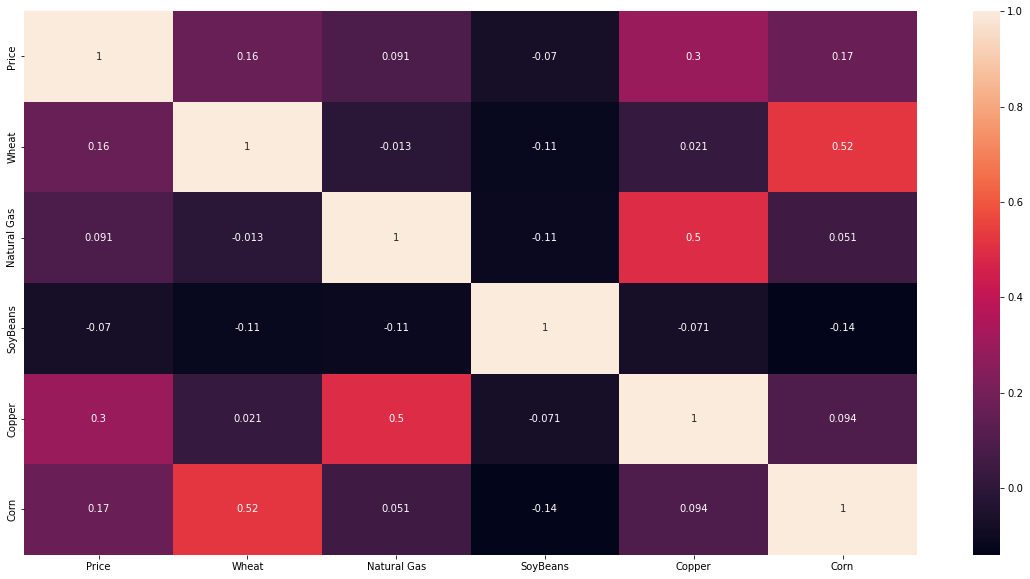

In [470]:
WTIvsCommodities_correlation = WTIvsCommodities.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = WTIvsCommodities_correlation, annot = True)

In [471]:
Y = WTIvsCommodities['Price']
X = WTIvsCommodities.drop('Price', axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

In [472]:
model = Ridge(max_iter= 1000)
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())

model = LinearRegression()
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())

model = Lasso(max_iter= 1000)
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())



Average R2 test scores: 0.014581506052467464

Average RMSE test scores: -23.18079319663562

Average R2 test scores: 0.01453082486706384

Average RMSE test scores: -23.181436391591767

Average R2 test scores: 0.028123792665769587

Average RMSE test scores: -23.022510669579418


### Financial Instruments

In [473]:
WTIvsBonds = opec_prodvsprice = pd.read_csv("WTI vs Bonds.csv", parse_dates = ['Date'], index_col = ['Date'])

<AxesSubplot:>

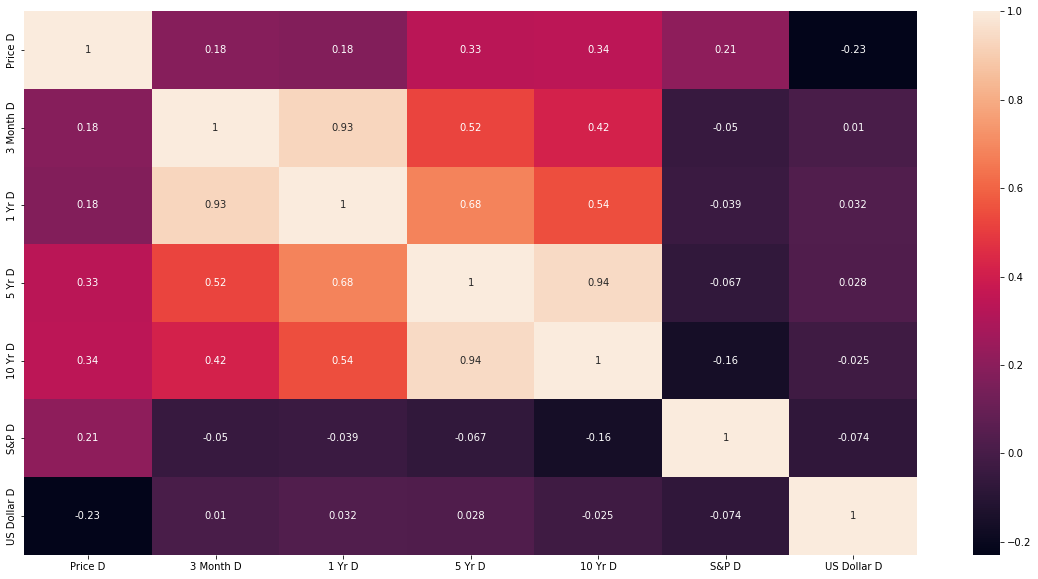

In [474]:
WTIvsBonds_correlation = WTIvsBonds.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = WTIvsBonds_correlation, annot = True)

In [475]:
Y = WTIvsBonds['Price D']
X = WTIvsBonds.drop('Price D', axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

In [476]:
model = Ridge(max_iter= 1000)
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())

model = LinearRegression()
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())

model = Lasso(max_iter= 1000)
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())



Average R2 test scores: -0.12311499454486179

Average RMSE test scores: -25.861528373794147

Average R2 test scores: -0.14885521435961577

Average RMSE test scores: -25.79854666196231

Average R2 test scores: -0.22431223879884388

Average RMSE test scores: -30.56702772925694


## Predict Up or Down